In [1]:
import os
os.chdir("C:/Users/zheng/Documents/Finance Research/Code")
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from datetime import timedelta, datetime as dt

ImportError: cannot import name 'select_freq' from 'o2_vix' (C:\Users\zheng\Documents\Finance Research\Code\o2_vix.py)

- Set up the dataframe of event dates

In [2]:
os.chdir("C:/Users/zheng/Documents/Finance Research/")
event_df = pd.read_csv("Data/macro/data/macro/macro_announcement_dates_202112.csv")
for col in event_df.columns:
    event_df[col] = pd.to_datetime(event_df[col], format="%m/%d/%Y")
# Add time on top of date for FOMC
# fomc_time = "14:00:00"
# event_df['New_FOMC'] =  pd.to_datetime(event_df["New_FOMC"].dt.strftime("%m/%d/%Y") + " " + fomc_time, format="%m/%d/%Y %H:%M:%S")
event_df.head()

,Unemployment Rate,Consumer Price Index,Producer Price Index,CFNAI,EIA,OPEC,IEA,Old_FOMC,New_FOMC,GDP Annualized Advanced,...,Factory Orders,New Home Sales,Personal Consumption,Monthly Budget Statement,Initial Jobless Claims,Chicago Purchasing Manager Index,U. Michigan Consumer Confidence P,U. Michigan Consumer Confidence F,Actual fed funds target rate FFTR,Inflation
0,1957-07-11,1953-02-27,1971-02-17,2001-03-05,2001-05-23,2001-01-19,1991-01-01,1936-03-19,1994-02-04,1968-01-16,...,1990-01-05,1990-01-03,1990-01-29,1990-02-22,1991-07-18,1996-11-27,1991-01-18,1991-02-01,1990-02-07,1980-02-15
1,1957-08-12,1953-03-26,1971-03-05,2001-04-03,2001-05-31,2001-02-20,1991-02-01,1936-05-25,1994-03-22,1968-04-17,...,1990-02-02,1990-01-31,1990-03-01,1990-03-21,1991-07-25,1996-12-31,1991-02-15,1991-03-01,1990-03-27,1980-03-07
2,1957-09-10,1953-04-22,1971-04-01,2001-05-02,2001-06-06,2001-03-22,1991-04-01,1936-11-20,1994-05-17,1968-07-18,...,1990-03-07,1990-03-02,1990-03-29,1990-04-20,1991-08-01,1997-01-31,1991-03-15,1991-03-29,1990-05-15,1980-04-04
3,1957-10-10,1953-05-22,1971-05-06,2001-05-31,2001-06-13,2001-04-20,1991-05-01,1937-01-26,1994-07-06,1968-10-16,...,1990-03-30,1990-03-28,1990-04-30,1990-05-21,1991-08-08,1997-02-28,1991-04-19,1991-05-03,1990-07-03,1980-05-09
4,1957-11-08,1953-06-23,1971-06-04,2001-07-05,2001-06-20,2001-05-17,1991-07-03,1937-03-15,1994-08-16,1969-01-14,...,1990-05-02,1990-04-30,1990-05-25,1990-06-21,1991-08-15,1997-03-31,1991-05-17,1991-05-31,1990-08-21,1980-06-06


: 

- Set up VIX Index, and VIX futures data frame in daily frequency

In [3]:
vix_index = pd.read_csv("Data/vix_futures/data/vix_futures/IAP/IAP.csv")
vix_index["Date"] = pd.to_datetime(vix_index["Date"], format="%m/%d/%Y")
vix_index = pd.DataFrame(vix_index.groupby(['Date'])['Price'].last()).reset_index()
vix_index.head()

# df = pd.read_csv("Data/vix_futures/data/vix_futures/Tickdata_VX_Quote/VXF19.csv")
# df["EndDt"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%m/%d/%Y %H:%M:%S.%f")
# # df.head()
# # df.iloc[361]
# (df['EndDt'] == df['EndDt'].dt.floor("D")).iloc[361]
# # df = df[df['EndDt'] == df['EndDt'].dt.floor("D")]
# # df.head()

,Date,Price
0,2003-07-01,21.29
1,2003-07-02,21.14
2,2003-07-03,21.67
3,2003-07-07,22.05
4,2003-07-08,21.40


In [4]:
vix_futures = pd.read_csv("Data/vix_futures/S&P 500 VIX Futures Historical Data.csv")
vix_futures['Date'] = pd.to_datetime(vix_futures["Date"], format="%m/%d/%Y")
vix_futures = vix_futures.sort_values("Date")
vix_futures.head()

,Date,Price,Open,High,Low,Vol.,Change %
3807,2009-10-14,23.23,23.52,23.63,22.75,NaN,-1.28%
3806,2009-10-15,22.38,23.23,23.58,22.38,NaN,-3.66%
3805,2009-10-16,22.38,22.38,23.15,22.08,NaN,0.00%
3804,2009-10-19,24.65,22.38,25.25,22.38,NaN,10.17%
3803,2009-10-20,24.55,24.65,24.95,24.33,NaN,-0.41%


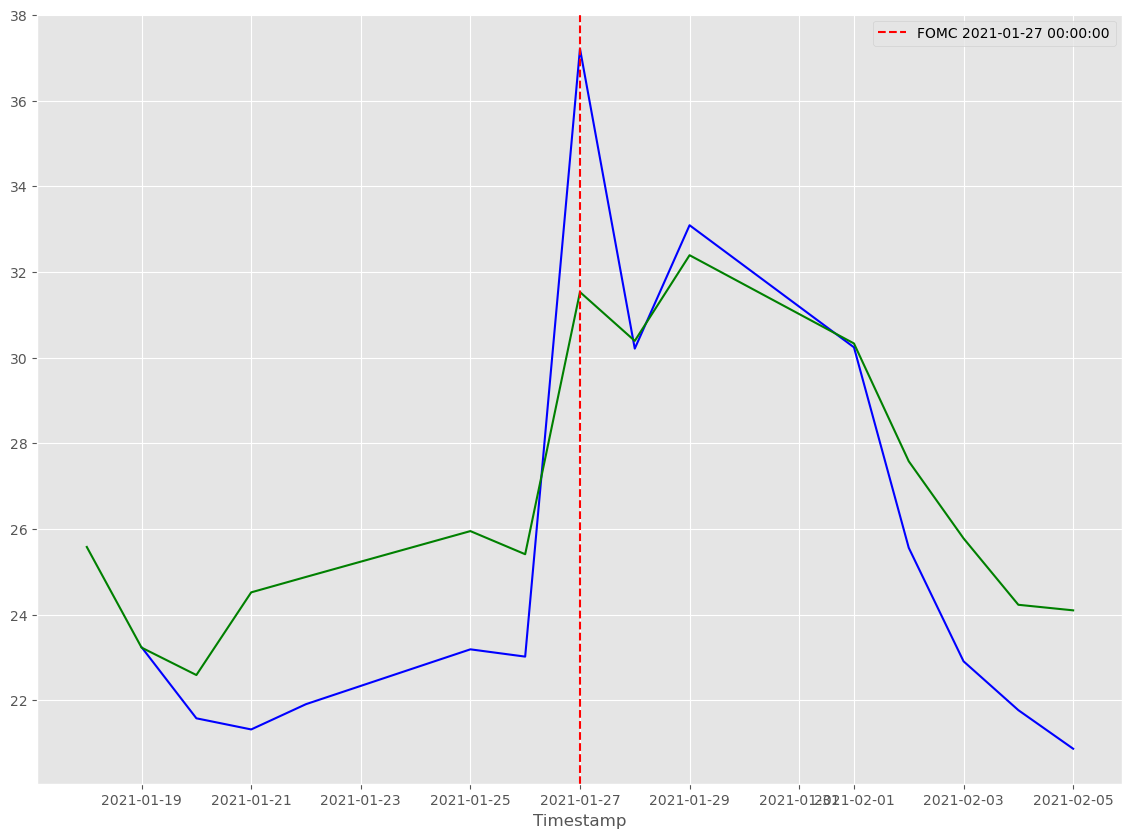

In [5]:
plot_vix_vixfutures(vix_index[['Date', 'Price']], 'Date', vix_futures[['Date', 'Price']], 
                    'Date', event_df['New_FOMC'], 'New_FOMC', dt(2021, 1, 17, 1) , dt(2021, 2,7,1))

In [11]:
vix_index["% Change"] = vix_index['Price'].pct_change() * 100
vix_index.head()

,Date,Price,% Change
0,2003-07-01,21.29,NaN
1,2003-07-02,21.14,-0.704556
2,2003-07-03,21.67,2.507096
3,2003-07-07,22.05,1.753576
4,2003-07-08,21.40,-2.947846


In [54]:
vix_mean = []
range = timedelta(10, 0, 0)
fomcs = event_df[event_df["New_FOMC"].isna() == False]['New_FOMC']
for fomc in fomcs:
    range_start = fomc - range
    range_end = fomc + range
    mask = (vix_index['Date'] >= range_start) & (vix_index['Date'] <= range_end)
    df = vix_index.loc[mask]
    vix_mean.append(list(df['Price']))
vix_means = []
for sample in vix_mean:
    if len(sample) != 0:
        vix_means.append(sample)

In [55]:
pd.DataFrame(vix_means).mean(axis=0)

0     18.798041
1     18.657770
2     18.729797
3     18.611088
4     18.621837
5     19.103946
6     18.922653
7     18.564558
8     18.796939
9     18.664626
10    18.745850
11    18.573810
12    18.658367
13    18.727877
14    18.153889
dtype: float64

In [13]:
vix_futures['% Change'] = vix_futures['Price'].pct_change() * 100
vix_futures.head()

,Date,Price,Open,High,Low,Vol.,Change %,% Change
3807,2009-10-14,23.23,23.52,23.63,22.75,NaN,-1.28%,NaN
3806,2009-10-15,22.38,23.23,23.58,22.38,NaN,-3.66%,-3.659062
3805,2009-10-16,22.38,22.38,23.15,22.08,NaN,0.00%,0.000000
3804,2009-10-19,24.65,22.38,25.25,22.38,NaN,10.17%,10.142985
3803,2009-10-20,24.55,24.65,24.95,24.33,NaN,-0.41%,-0.405680


In [56]:
vix_futures_mean = []
range = timedelta(10, 0, 0)
fomcs = event_df[event_df["New_FOMC"].isna() == False]['New_FOMC']
for fomc in fomcs:
    range_start = fomc - range
    range_end = fomc + range
    mask = (vix_futures['Date'] >= range_start) & (vix_futures['Date'] <= range_end)
    df = vix_futures.loc[mask]
    vix_futures_mean.append(list(df['Price']))
vix_futures_means = []
for sample in vix_futures_mean:
    if len(sample) != 0:
        vix_futures_means.append(sample)

In [57]:
pd.DataFrame(vix_futures_means).mean(axis=0)

0     18.441753
1     18.400515
2     18.551443
3     18.529691
4     18.518660
5     18.688557
6     18.592371
7     18.577732
8     18.872784
9     18.858969
10    18.860619
11    18.791031
12    18.904742
13    18.972990
14    18.649286
15    20.906667
dtype: float64

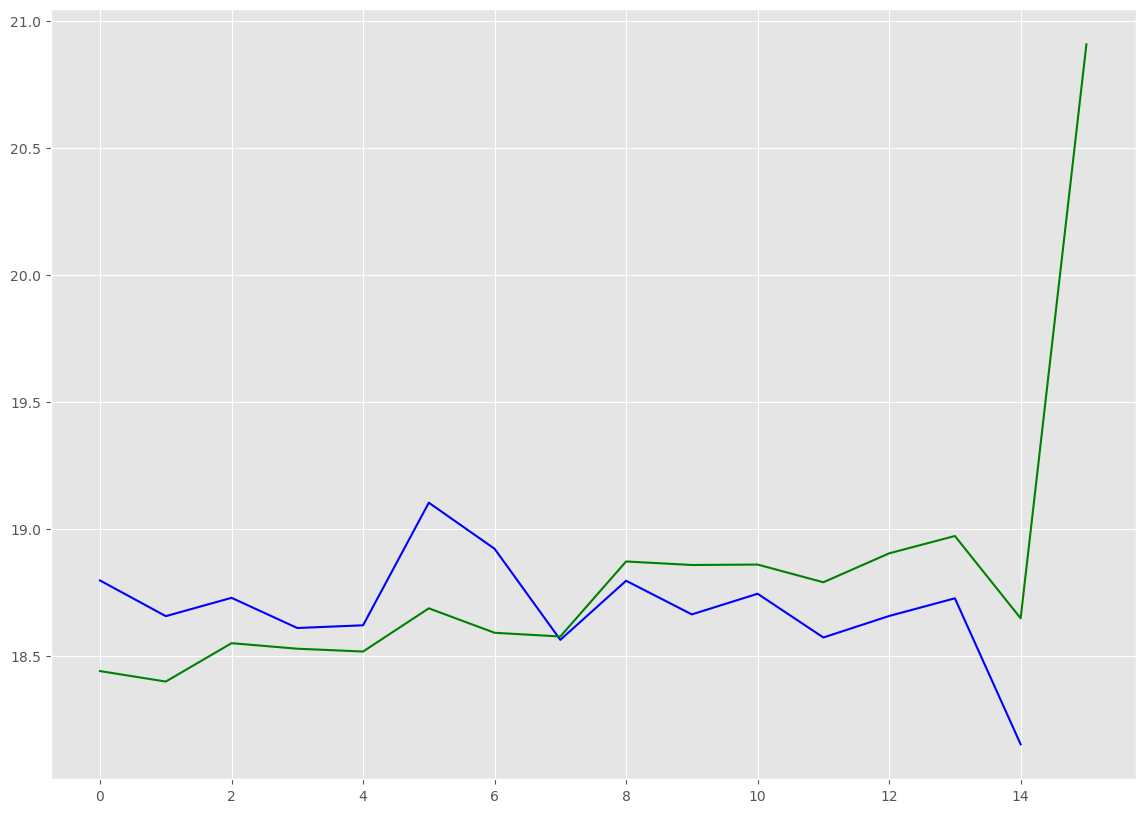

In [58]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(pd.DataFrame(vix_means).mean(axis=0), color='b')
ax.plot(pd.DataFrame(vix_futures_means).mean(axis=0), color='g')